# Introduction

This lab demonstrates how to use univariate feature selection to improve classification accuracy on a noisy dataset. Support vector machine (SVM) is used to classify the dataset both before and after applying univariate feature selection. For each feature, we plot the p-values for the univariate feature selection and the corresponding weights of SVMs. With this, we will compare model accuracy and examine the impact of univariate feature selection on model weights.

# Generate Sample Data

First, we will generate some sample data for the demonstration. We will use the iris dataset and add some noisy data to it that is not correlated.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# add the noisy data to the informative features
X = np.hstack((X, E))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Univariate Feature Selection

Next, we will perform univariate feature selection with F-test for feature scoring. We will use the default selection function to select the four most significant features.

📌 What is Univariate Feature Selection?
It’s a method that evaluates each feature (column) individually to determine how strongly it relates to the target variable (y). “Univariate” means one variable (feature) at a time — no interaction between features is considered.

⚙️ What is the F-test in this context?
The F-test (specifically ANOVA F-value) is a statistical test used to check whether the means of a feature differ significantly across classes.

It’s commonly used when the target variable is categorical (like in classification tasks, e.g., Iris dataset with 3 classes).

A higher F-score means the feature is more discriminative (useful).

In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# Plot Feature Univariate Score

We can plot the univariate scores for each feature to see which features are significant.

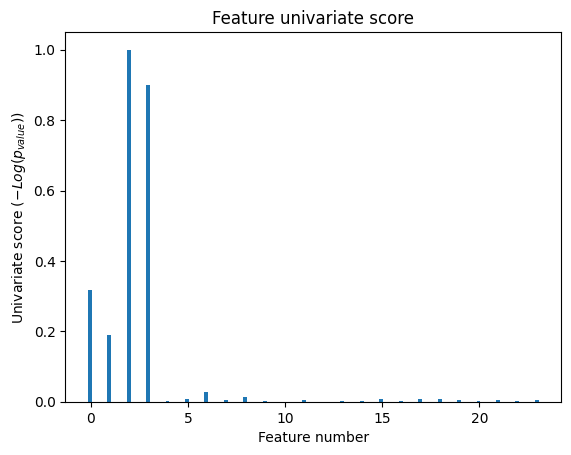

In [5]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

# Compare with SVMs

We will now compare the SVM classification accuracy with and without univariate feature selection.

# Without Univariate Feature Selection

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(random_state=0, dual='auto'))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.900


# After Univariate Feature Selection

In [8]:
clf_selected = make_pipeline(
    SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC(random_state=0, dual='auto')
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 0.967


# Plot Comparing Feature Selection

We can plot the feature scores and weights for each feature to see the impact of univariate feature selection.

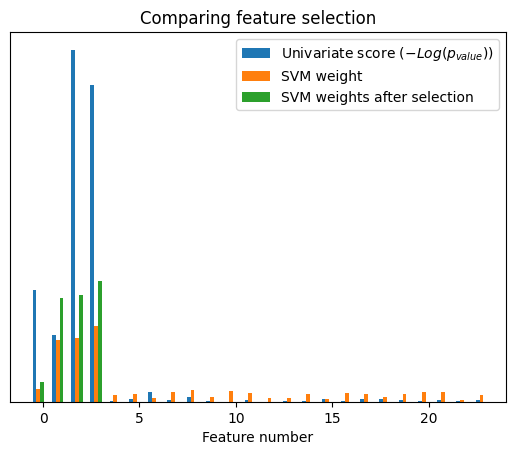

In [9]:
plt.bar(
    X_indices - 0.45, scores, width=0.2, label=r"Univariate score ($-Log(p_{value})$)"
)

plt.bar(X_indices - 0.25, svm_weights, width=0.2, label="SVM weight")

plt.bar(
    X_indices[selector.get_support()] - 0.05,
    svm_weights_selected,
    width=0.2,
    label="SVM weights after selection",
)

plt.title("Comparing feature selection")
plt.xlabel("Feature number")
plt.yticks(())
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

# Summary

This lab demonstrated how to use univariate feature selection to improve classification accuracy on a noisy dataset. We generated sample data, performed univariate feature selection, and compared SVM classification accuracy with and without univariate feature selection. We also plotted the feature scores and weights for each feature to see the impact of univariate feature selection.